In [1]:
import pandas as pd #For reading data from files into table
import numpy as np #For computing maths on data columns
from matplotlib import pyplot as plt #For plotting basic graphs. Also provides indepth framework for seaborn
import seaborn as sns #For plotting visually asthetic graphs. Works in tandem with matplotlib's pyplot

# Gather 

For this project we would be considering the Kaggle dataset on beers and breweries they originate from.  
<TBD>

In [16]:
#Loading beers.csv
df_beer = pd.read_csv('beers.csv')

#Loading breweries.csv
df_breweries = pd.read_csv('breweries.csv')

# Assess 

In [4]:
df_beer.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [7]:
df_breweries.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [8]:
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   abv         2348 non-null   float64
 2   ibu         1405 non-null   float64
 3   id          2410 non-null   int64  
 4   name        2410 non-null   object 
 5   style       2405 non-null   object 
 6   brewery_id  2410 non-null   int64  
 7   ounces      2410 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB


In [9]:
df_breweries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  558 non-null    int64 
 1   name        558 non-null    object
 2   city        558 non-null    object
 3   state       558 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.6+ KB


In [19]:
#Keeping only columns that are required for df_beers
variables_beer = ['abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces']
df_beer = df_beer[variables_beer]

#Keeping only columns that are required for df_breweries
variables_breweries = ['name', 'city', 'state']
df_breweries = df_breweries[variables_breweries]

In [20]:
df_beer.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


#### Data Quality:

- ibu is present for 1405 rows
- abv is missing for 62 rows

#### Data Tidiness

N/A

# Cleaning 

Creating copies of both the dataframes first

In [21]:
df_beer_copy = df_beer.copy()
df_breweries_copy = df_breweries.copy()

### Cleaning 1

##### Define  
Remove all rows without ibu or abv

##### Code

In [26]:
# Removing all rows without ibu and 
df_beer_copy = df_beer_copy[(~df_beer_copy['ibu'].isna()) | (~df_beer_copy['abv'].isna())]

In [30]:
df_beer_copy.reset_index(inplace=True, drop=True)

##### Check

In [31]:
df_beer_copy[df_beer_copy['ibu'].isna()]

,abv,ibu,id,name,style,brewery_id,ounces


In [32]:
df_beer_copy[df_beer_copy['abv'].isna()]

,abv,ibu,id,name,style,brewery_id,ounces


### Merging Beers with Breweries

In [53]:
df_copy = df_beer_copy.merge(df_breweries_copy, how='left', left_on='brewery_id', right_on=df_breweries_copy.index)

In [58]:
cols = ['ABV', 'IBU', 'Beer ID', 'Beer Name', 'Beer Style', 'Brewery ID', 'Serving Size (in Oz.)', 'Brewery Name', 'Brewery City', 'Brewery State']
df_copy.columns = cols

# Analyze 

#### Univariate Analysis 

##### Style of Beer

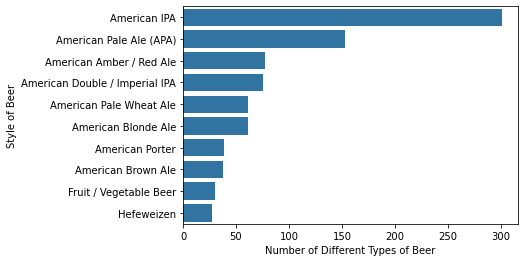

In [95]:
#Considering the top 10 beer styles by count
top_10_beer = df_copy['Beer Style'].value_counts()[0:10].index
df_beer_sub = df_copy[df_copy['Beer Style'].isin(top_10_beer)]

#Plotting the top 10 beer styles in a histogram
color = sns.color_palette()[0]
sns.countplot(data= df_beer_sub, y='Beer Style', order = top_10_beer, color=color)
plt.ylabel('Style of Beer')
plt.xlabel('Number of Different Types of Beer');

Seems like American IPA is the most favored beer style in the United States. On a distant second, Americans prefer the American Pale Ale followed by American Amber / Red Ale.

##### Types of Breweries

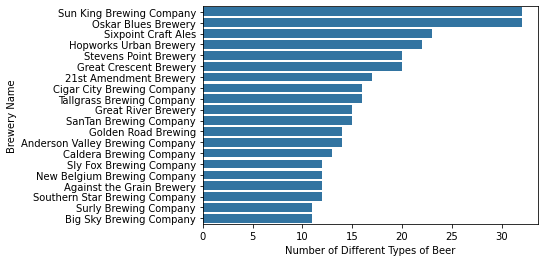

In [96]:
#Considering the top 20 Breweries by count
top_20_breweries = df_copy['Brewery Name'].value_counts()[0:20].index
df_brewery_sub = df_copy[df_copy['Brewery Name'].isin(top_20_breweries)]

#Plotting the top 10 Breweries in a histogram
color = sns.color_palette()[0]
sns.countplot(data= df_brewery_sub, y='Brewery Name', order = top_20_breweries, color=color)
plt.ylabel('Brewery Name')
plt.xlabel('Number of Different Types of Beer');

##### Top States for Breweries

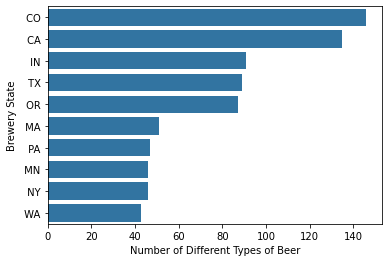

In [97]:
#Considering the top 10 States of Breweries by count
top_10_state = df_copy['Brewery State'].value_counts()[0:10].index
df_state_sub = df_copy[df_copy['Brewery State'].isin(top_10_state)]

#Plotting the top 10 States of Breweries in a histogram
color = sns.color_palette()[0]
sns.countplot(data= df_state_sub, y='Brewery State', order = top_10_state, color=color)
plt.ylabel('Brewery State')
plt.xlabel('Number of Different Types of Beer');

In [69]:
df_copy.columns

Index(['ABV', 'IBU', 'Beer ID', 'Beer Name', 'Beer Style', 'Brewery ID',
       'Serving Size (in Oz.)', 'Brewery Name', 'Brewery City',
       'Brewery State'],
      dtype='object')

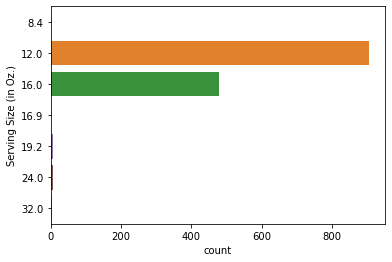

In [70]:
sns.countplot(data = df_copy, y='Serving Size (in Oz.)')

In [87]:
y = np.log2(df_copy['IBU']).tolist()

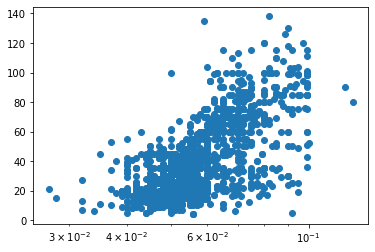

In [91]:
plt.scatter(data=df_copy, x='ABV', y='IBU')
plt.xscale('log')

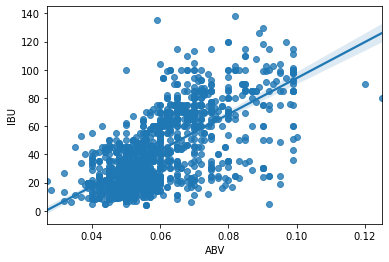

In [109]:
sns.regplot(data=df_copy, x='ABV', y='IBU')

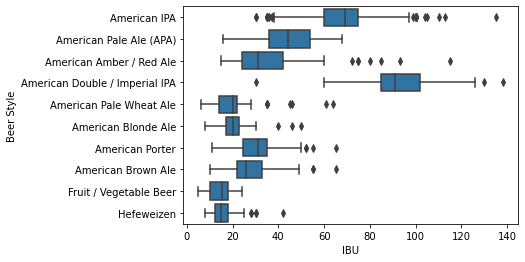

In [107]:
sns.boxplot(data=df_beer_sub, y='Beer Style', x='IBU', order=top_10_beer, color=color)

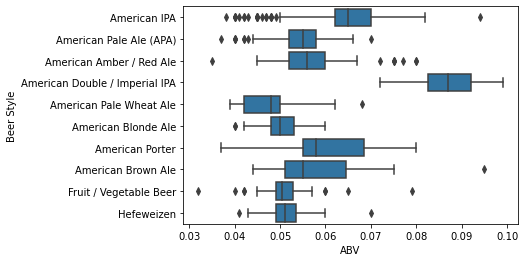

In [108]:
sns.boxplot(data=df_beer_sub, y='Beer Style', x='ABV', order=top_10_beer, color=color)

In [133]:
df_copy['ABV'].describe()

count    1405.000000
mean        0.059914
std         0.013576
min         0.027000
25%         0.050000
50%         0.057000
75%         0.068000
max         0.125000
Name: ABV, dtype: float64

Text(0.5, 0, 'Number of Beers')

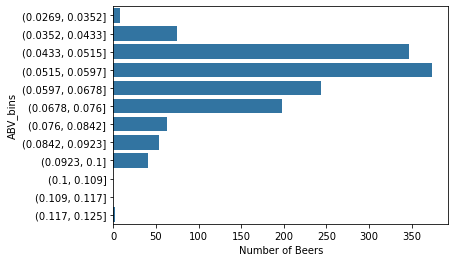

In [141]:
df_copy['ABV_bins'] = pd.cut(df_copy['ABV'], 12)
sns.countplot(data=df_copy, y='ABV_bins', color=color)
plt.xlabel('Number of Beers')

Text(0.5, 0, 'Number of Beers')

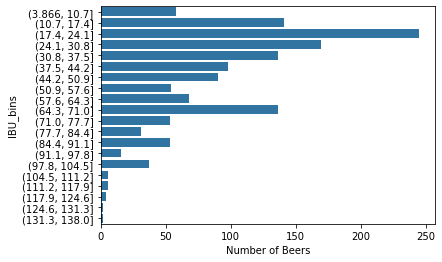

In [144]:
df_copy['IBU_bins'] = pd.cut(df_copy['IBU'], 20)
sns.countplot(data=df_copy, y='IBU_bins', color=color)
plt.xlabel('Number of Beers')